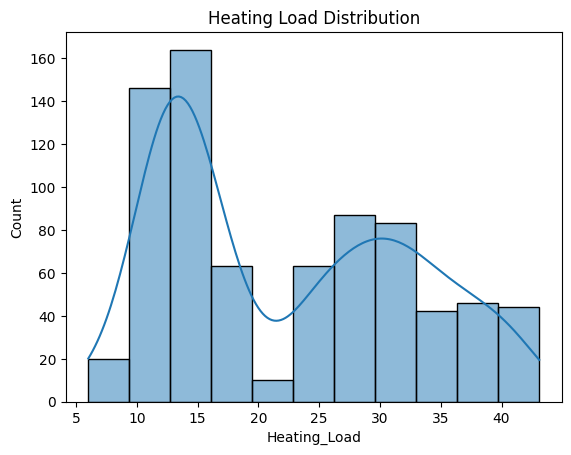

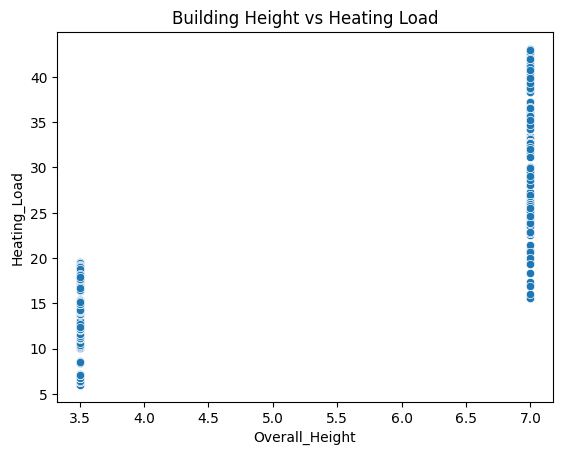

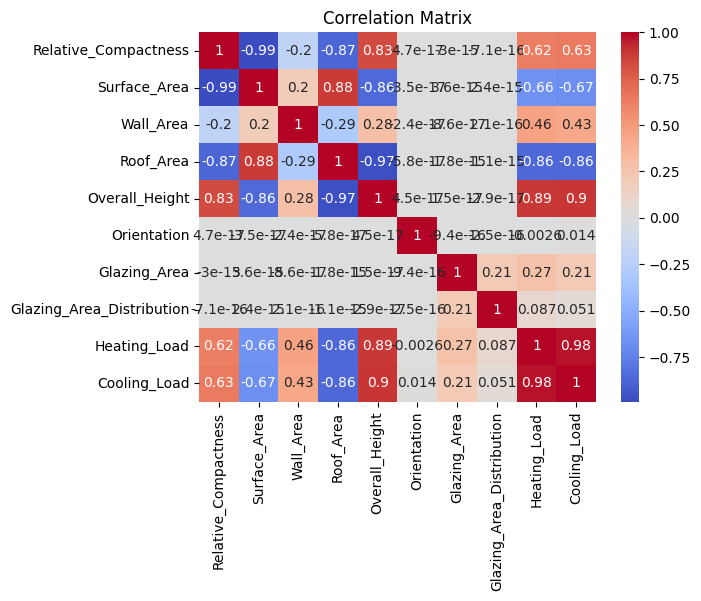

Linear Regression R2: 0.9121846294352439
Linear Regression MSE: 9.15320764594167
Random Forest R2: 0.997689623197612
Random Forest MSE: 0.24081614046175925


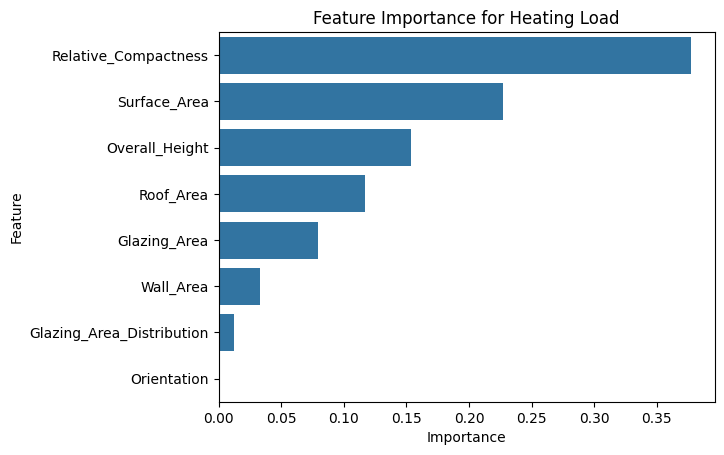

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ---------------- Load Excel Dataset ----------------
df = pd.read_excel("ENB2012_data.xlsx")

# Rename columns for readability
df.columns = [
    "Relative_Compactness", "Surface_Area", "Wall_Area", "Roof_Area",
    "Overall_Height", "Orientation", "Glazing_Area", "Glazing_Area_Distribution",
    "Heating_Load", "Cooling_Load"
]

# ---------------- EDA ----------------
sns.histplot(df["Heating_Load"], kde=True)
plt.title("Heating Load Distribution")
plt.show()

sns.scatterplot(
    x="Overall_Height",
    y="Heating_Load",
    data=df
)
plt.title("Building Height vs Heating Load")
plt.show()

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# ---------------- Features & Target ----------------
X = df.drop(["Heating_Load", "Cooling_Load"], axis=1)
y = df["Heating_Load"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------- Model 1: Linear Regression ----------------
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, lr_pred))
print("Linear Regression MSE:", mean_squared_error(y_test, lr_pred))

# ---------------- Model 2: Random Forest ----------------
rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, rf_pred))
print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))

# ---------------- Feature Importance ----------------
feature_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_df
)
plt.title("Feature Importance for Heating Load")
plt.show()
